# **Yoga Poses Detection**

**This project is presented by:
    Arsalene Khachmadi, Khadija Khanfir, Dhia Aderssa, Iheb Yahyaoui, Mohamed Dehmani Temani, Asma Saadi.**

# **Project goals**

**Prediction of yoga poses from actual images.
The relization of the architectures from scratch.
And finally the optimization of the model to obtain better results.**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

# Data Visualization

In [8]:
path = '/kaggle/input/yoga-poses/DATASET/TRAIN'
path2 = '/kaggle/input/yoga-poses/DATASET/TEST'
classes = os.path.join(path, path2)
classes

'/kaggle/input/yoga-poses/DATASET/TEST'

In [9]:
classes1 = os.listdir(path)
classes1

['downdog', 'tree', 'plank', 'warrior2', 'goddess']

In [10]:
classes2 = os.listdir(classes)
classes2

['downdog', 'tree', 'plank', 'warrior2', 'goddess']

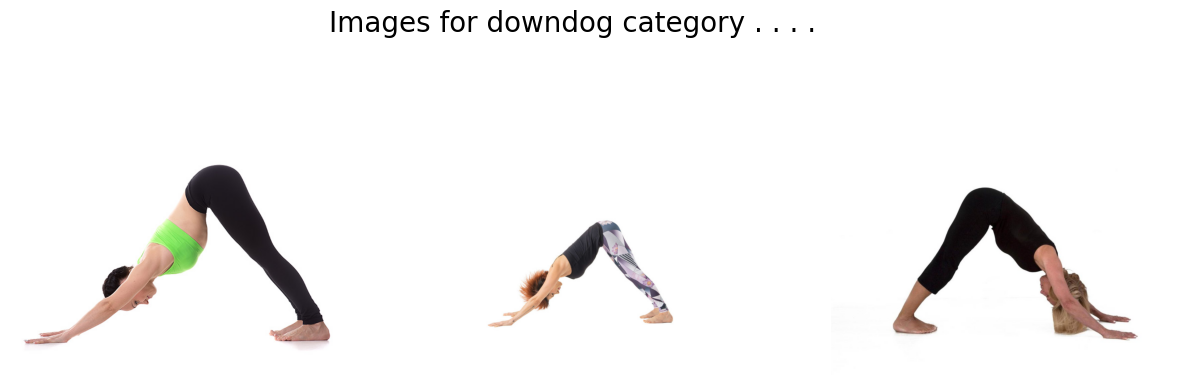

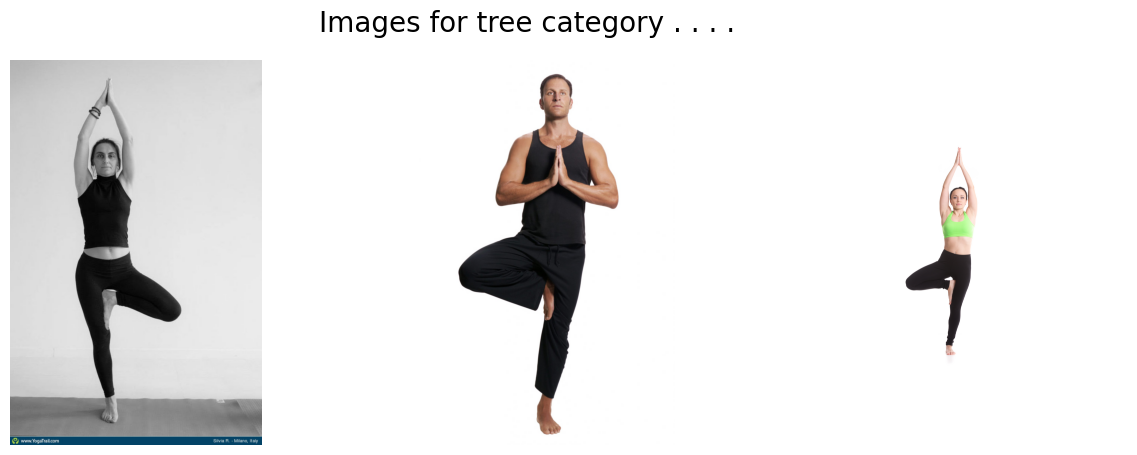

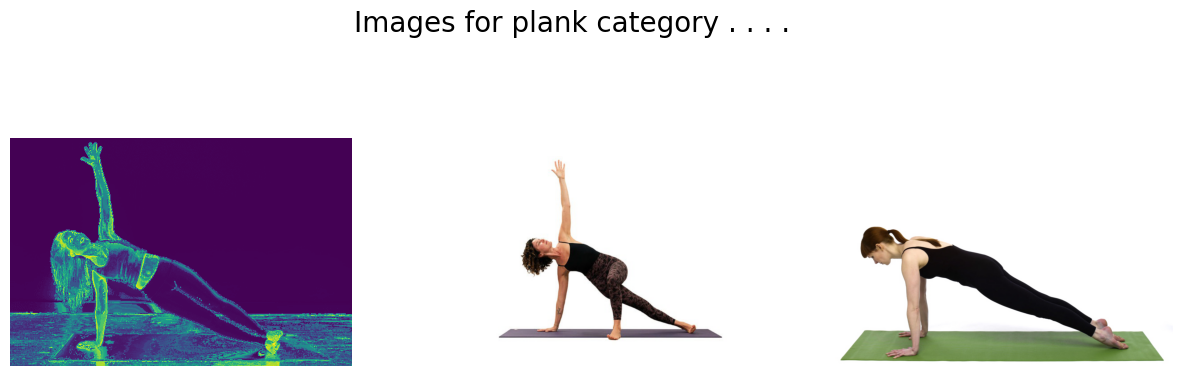

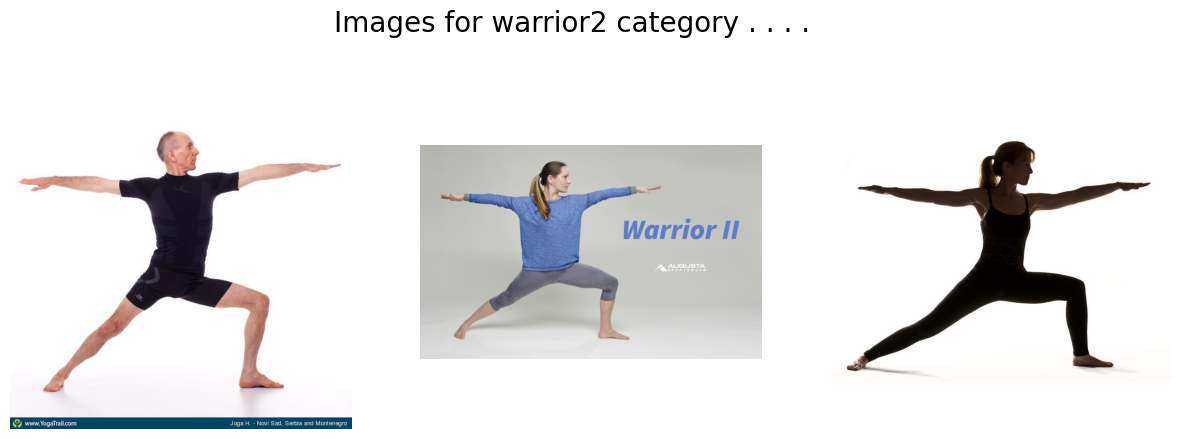

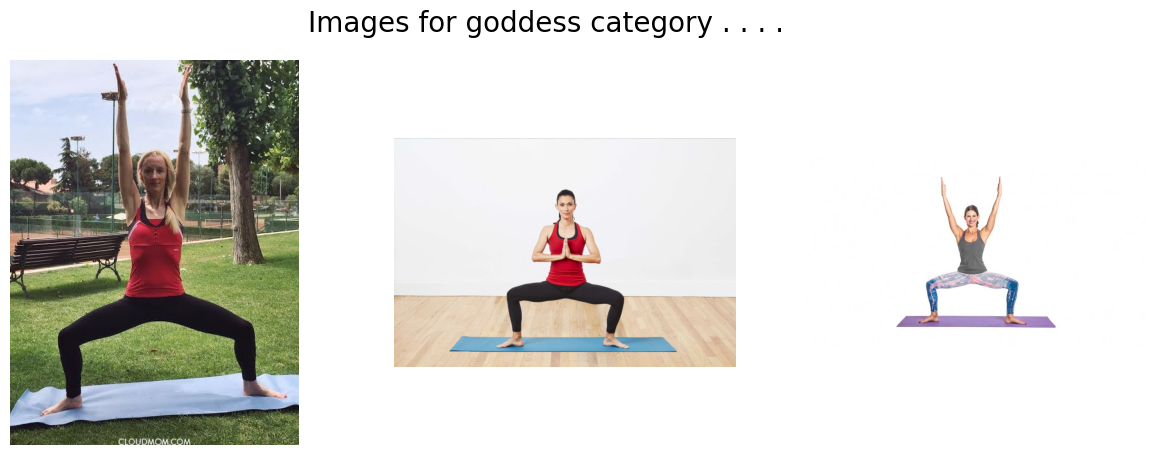

In [11]:
for cat in classes2:
    image_dir = f'{classes}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{classes}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

# Data Preparation

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,  preprocess_input
from tensorflow.keras.applications import VGG19

from sklearn.metrics import classification_report, confusion_matrix

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras import layers

In [13]:
train_dir = '/kaggle/input/yoga-poses/DATASET/TRAIN' #directory with training images
test_dir = '/kaggle/input/yoga-poses/DATASET/TEST' #directory with testing images

In [14]:
train_dir

'/kaggle/input/yoga-poses/DATASET/TRAIN'

In [29]:
# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

train_datagen = ImageDataGenerator(preprocessing_function= scalar,rotation_range=10,
width_shift_range=0.05,
height_shift_range=0.05,
zoom_range=0.05,
horizontal_flip=True,
vertical_flip=True,
brightness_range = [0.5,1.4],
validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [16]:
#prepocess of our input images
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')


Found 862 images belonging to 5 classes.


In [17]:
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 90 images belonging to 5 classes.


# Data Modeling

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
import torch
import torch.optim as optim

**we have used 4 types of optimizers in order to have better results and to compare between them.**

In [31]:
optimizer = Adam(learning_rate=0.001)
optimizer2 =RMSprop(learning_rate=0.001,momentum=0.9)    
optimizer3 =SGD(learning_rate=0.001, momentum=0.9)
optimizer4 = Adamax(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])


In [ ]:
model.summary()

**The CNN model developed contains 205 million parameters => this number will help us to achieve high performance model and good results.**

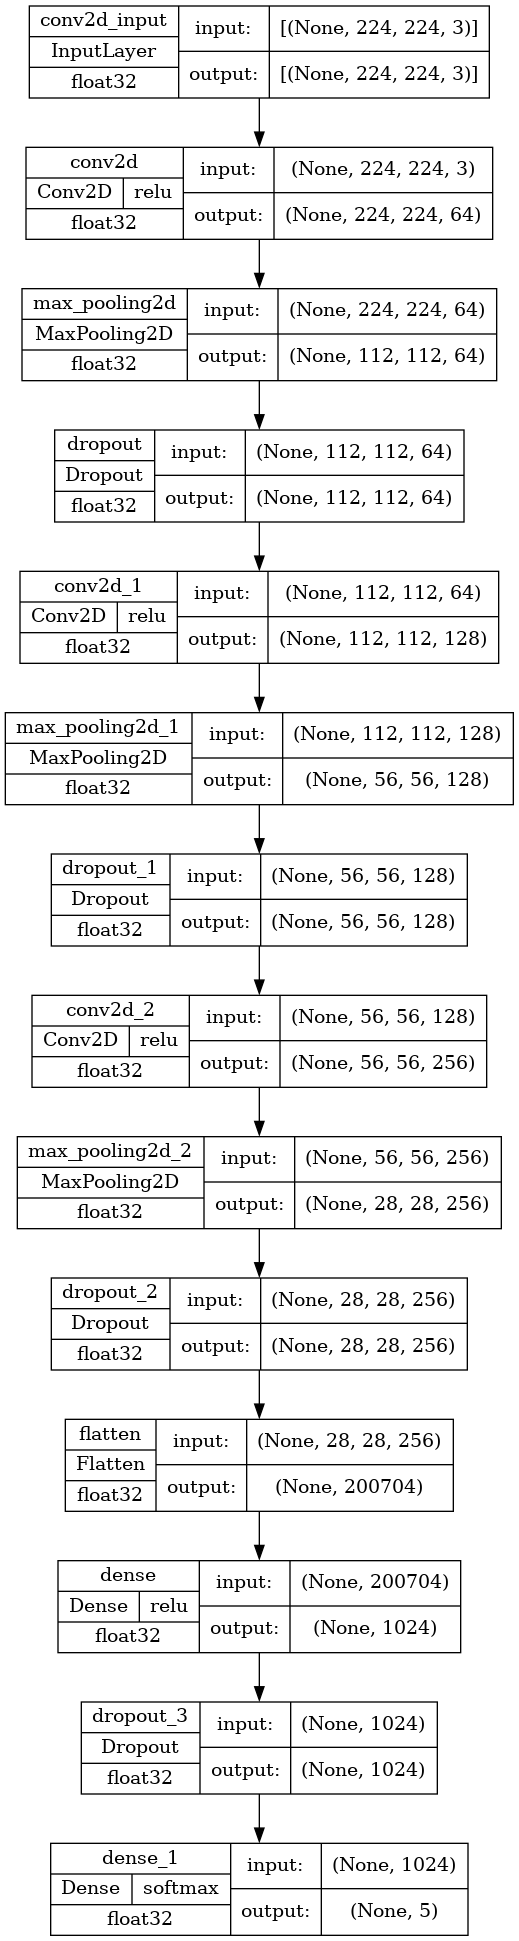

In [20]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)

In [32]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
import keras
import keras.utils
from keras import utils as np_utils
# import the time module
import time


In [33]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans == 'Y' or ans == 'y':
            self.ask_permission = 1
        elif ans == 'N' or ans == 'n':
            self.ask_permission = 0
       
        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()
 # Define a function that will run when train ends

    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')
       
        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss
            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                else:
                    self.count = self.count + 1 # increment the patience counter
                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)
                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training
                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch ' + str(self.ask_epoch)
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)
                        except:
                            print('Invalid')

In [34]:
   
patience = 1      
stop_patience = 3
threshold = 0.9    
factor = 0.5       
ask_epoch = 5      
batches = int(np.ceil(len(train_generator.labels) / batch_size))   

callbacks = [MyCallback(model= model, patience= patience,
            stop_patience= stop_patience, threshold= threshold, factor= factor,
            batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [25]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks= callbacks)

Do you want model asks you to halt the training [y/n] ?


 y


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
Epoch 1/20


2023-04-17 22:34:23.851833: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


54/54 [==============================] - 42s 631ms/step - loss: 4.4326 - accuracy: 0.2077 - val_loss: 1.5971 - val_accuracy: 0.2444
Epoch 2/20
54/54 [==============================] - 27s 491ms/step - loss: 1.5953 - accuracy: 0.2633 - val_loss: 1.5822 - val_accuracy: 0.3778
Epoch 3/20
54/54 [==============================] - 27s 497ms/step - loss: 1.5436 - accuracy: 0.3306 - val_loss: 1.3886 - val_accuracy: 0.5444
Epoch 4/20
54/54 [==============================] - 27s 497ms/step - loss: 1.4566 - accuracy: 0.4234 - val_loss: 1.2995 - val_accuracy: 0.6222
Epoch 5/20
54/54 [==============================] - ETA: 0s - loss: 1.3424 - accuracy: 0.5046 .26610                     processing batch 1 of 11   -   accuracy=  56.250   -   loss:  1.34523                     processing batch 2 of 11   -   accuracy=  52.083   -   loss:  1.36350                     processing batch 3 of 11   -   accuracy=  48.438   -   loss:  1.39075                     processing batch 4 of 11   -   accuracy=  51.250

 5


 training will continue until epoch 10
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 95s 2s/step - loss: 1.3424 - accuracy: 0.5046 - val_loss: 0.9977 - val_accuracy: 0.7111
Epoch 6/20
54/54 [==============================] - 26s 473ms/step - loss: 1.2708 - accuracy: 0.5012 - val_loss: 0.9746 - val_accuracy: 0.7222
Epoch 7/20
54/54 [==============================] - 26s 480ms/step - loss: 1.2107 - accuracy: 0.5464 - val_loss: 0.8589 - val_accuracy: 0.7444
Epoch 8/20
54/54 [==============================] - 26s 483ms/step - loss: 1.1495 - accuracy: 0.5510 - val_loss: 0.8047 - val_accuracy: 0.7778
Epoch 9/20
54/54 [==============================] - 26s 491ms/step - loss: 1.1469 - accuracy: 0.5696 - val_loss: 0.7601 - val_accuracy: 0.7556
Epoch 10/20
54/54 [==============================] - ETA: 0s - loss: 1.0712 - accuracy: 0.6067 .15032                     processing batch 1 of 11   -   accuracy=  34.3

 5


 training will continue until epoch 15
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 32s 598ms/step - loss: 1.0712 - accuracy: 0.6067 - val_loss: 0.7278 - val_accuracy: 0.7889
Epoch 11/20
54/54 [==============================] - 25s 469ms/step - loss: 1.0714 - accuracy: 0.5928 - val_loss: 0.6696 - val_accuracy: 0.7889
Epoch 12/20
54/54 [==============================] - 26s 491ms/step - loss: 1.0308 - accuracy: 0.6160 - val_loss: 0.6480 - val_accuracy: 0.8000
Epoch 13/20
54/54 [==============================] - 27s 492ms/step - loss: 0.9977 - accuracy: 0.6299 - val_loss: 0.6065 - val_accuracy: 0.7889
Epoch 14/20
54/54 [==============================] - 26s 482ms/step - loss: 0.9875 - accuracy: 0.6357 - val_loss: 0.6100 - val_accuracy: 0.7889
Epoch 15/20
54/54 [==============================] - ETA: 0s - loss: 0.9820 - accuracy: 0.6415 .97136                     processing batch 1 of 11   -   accuracy

 5


 training will continue until epoch 20
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 51s 948ms/step - loss: 0.9820 - accuracy: 0.6415 - val_loss: 0.5897 - val_accuracy: 0.8000
Epoch 16/20
54/54 [==============================] - 26s 476ms/step - loss: 0.9666 - accuracy: 0.6288 - val_loss: 0.5730 - val_accuracy: 0.8000
Epoch 17/20
54/54 [==============================] - 26s 487ms/step - loss: 0.9322 - accuracy: 0.6531 - val_loss: 0.5657 - val_accuracy: 0.8000
Epoch 18/20
54/54 [==============================] - 25s 466ms/step - loss: 0.9305 - accuracy: 0.6520 - val_loss: 0.5682 - val_accuracy: 0.8000
Epoch 19/20
54/54 [==============================] - 25s 472ms/step - loss: 0.9378 - accuracy: 0.6404 - val_loss: 0.5514 - val_accuracy: 0.8111
Epoch 20/20
54/54 [==============================] - ETA: 0s - loss: 0.8632 - accuracy: 0.6740 .86624                     processing batch 1 of 11   -   accuracy

 5


 training will continue until epoch 25
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 30s 556ms/step - loss: 0.8632 - accuracy: 0.6740 - val_loss: 0.5436 - val_accuracy: 0.8000
training elapsed time was 0.0 hours, 10.0 minutes, 40.68 seconds)


In [35]:
history2 = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks= callbacks)

Do you want model asks you to halt the training [y/n] ?


 y


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
Epoch 1/20


2023-04-17 22:48:31.352580: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


54/54 [==============================] - 30s 503ms/step - loss: 1.3624 - accuracy: 0.4594 - val_loss: 1.0381 - val_accuracy: 0.7333
Epoch 2/20
54/54 [==============================] - 26s 483ms/step - loss: 1.1487 - accuracy: 0.5858 - val_loss: 0.6109 - val_accuracy: 0.7889
Epoch 3/20
54/54 [==============================] - 27s 491ms/step - loss: 1.0512 - accuracy: 0.6195 - val_loss: 0.5171 - val_accuracy: 0.8111
Epoch 4/20
54/54 [==============================] - 26s 491ms/step - loss: 0.8921 - accuracy: 0.6508 - val_loss: 0.5665 - val_accuracy: 0.8111
Epoch 5/20
54/54 [==============================] - ETA: 0s - loss: 0.8122 - accuracy: 0.6995 .21342                     processing batch 1 of 11   -   accuracy=  59.375   -   loss:  1.04271                     processing batch 2 of 11   -   accuracy=  66.667   -   loss:  0.87282                     processing batch 3 of 11   -   accuracy=  65.625   -   loss:  0.93763                     processing batch 4 of 11   -   accuracy=  68.750

 10


 training will continue until epoch 15
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 35s 650ms/step - loss: 0.8122 - accuracy: 0.6995 - val_loss: 0.4455 - val_accuracy: 0.8333
Epoch 6/20
54/54 [==============================] - 26s 493ms/step - loss: 0.7533 - accuracy: 0.7262 - val_loss: 0.3995 - val_accuracy: 0.8111
Epoch 7/20
54/54 [==============================] - 26s 486ms/step - loss: 0.6401 - accuracy: 0.7645 - val_loss: 0.2839 - val_accuracy: 0.9111
Epoch 8/20
54/54 [==============================] - 26s 493ms/step - loss: 0.6128 - accuracy: 0.7947 - val_loss: 0.3697 - val_accuracy: 0.8667
Epoch 9/20
54/54 [==============================] - 27s 482ms/step - loss: 0.5410 - accuracy: 0.8097 - val_loss: 0.4572 - val_accuracy: 0.8556
Epoch 10/20
54/54 [==============================] - 26s 486ms/step - loss: 0.5310 - accuracy: 0.8295 - val_loss: 0.2914 - val_accuracy: 0.8778
Epoch 11/20
54/54 [==

 5


 training will continue until epoch 20
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
54/54 [==============================] - 41s 754ms/step - loss: 0.2984 - accuracy: 0.9002 - val_loss: 0.3429 - val_accuracy: 0.8778
Epoch 16/20
54/54 [==============================] - 25s 466ms/step - loss: 0.2660 - accuracy: 0.9234 - val_loss: 0.2684 - val_accuracy: 0.8556
Epoch 17/20
54/54 [==============================] - ETA: 0s - loss: 0.1781 - accuracy: 0.9524 .19143                     processing batch 1 of 11   -   accuracy=  90.000   -   loss:  0.37842                     processing batch 2 of 11   -   accuracy=  91.304   -   loss:  0.28774                     processing batch 3 of 11   -   accuracy=  93.548   -   loss:  0.23911                     processing batch 4 of 11   -   accuracy=  93.590   -   loss:  0.21731                     processing batch 5 of 11   -   accuracy=  94.681   -   loss:  0.21666                     processing batch 6 of

In [ ]:
history3 = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks= callbacks)

In [ ]:
history4 = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks= callbacks)

In [ ]:
import torch
import torch.optim as optim

# Define the model and loss function
model = MyModel()
criterion = nn.CrossEntropyLoss()

# Define the optimizer with RMSprop algorithm and learning rate
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

## nn.CrossEntropyLoss(): is a loss function commonly used for multi-class classification problems, 
#where the model is trained to predict the probability of each class for a given input 
#and the true class is represented as a one-hot encoded vector. The loss function calculates
#the difference between the predicted and true class probabilities 
#and returns a scalar value that is used to update the model parameters during training.

# Model Evaluation

In [41]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

3/3 [==============================] - 3s 923ms/step - loss: 0.2538 - accuracy: 0.8889
final train accuracy = 91.07 , validation accuracy = 88.89


In [38]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

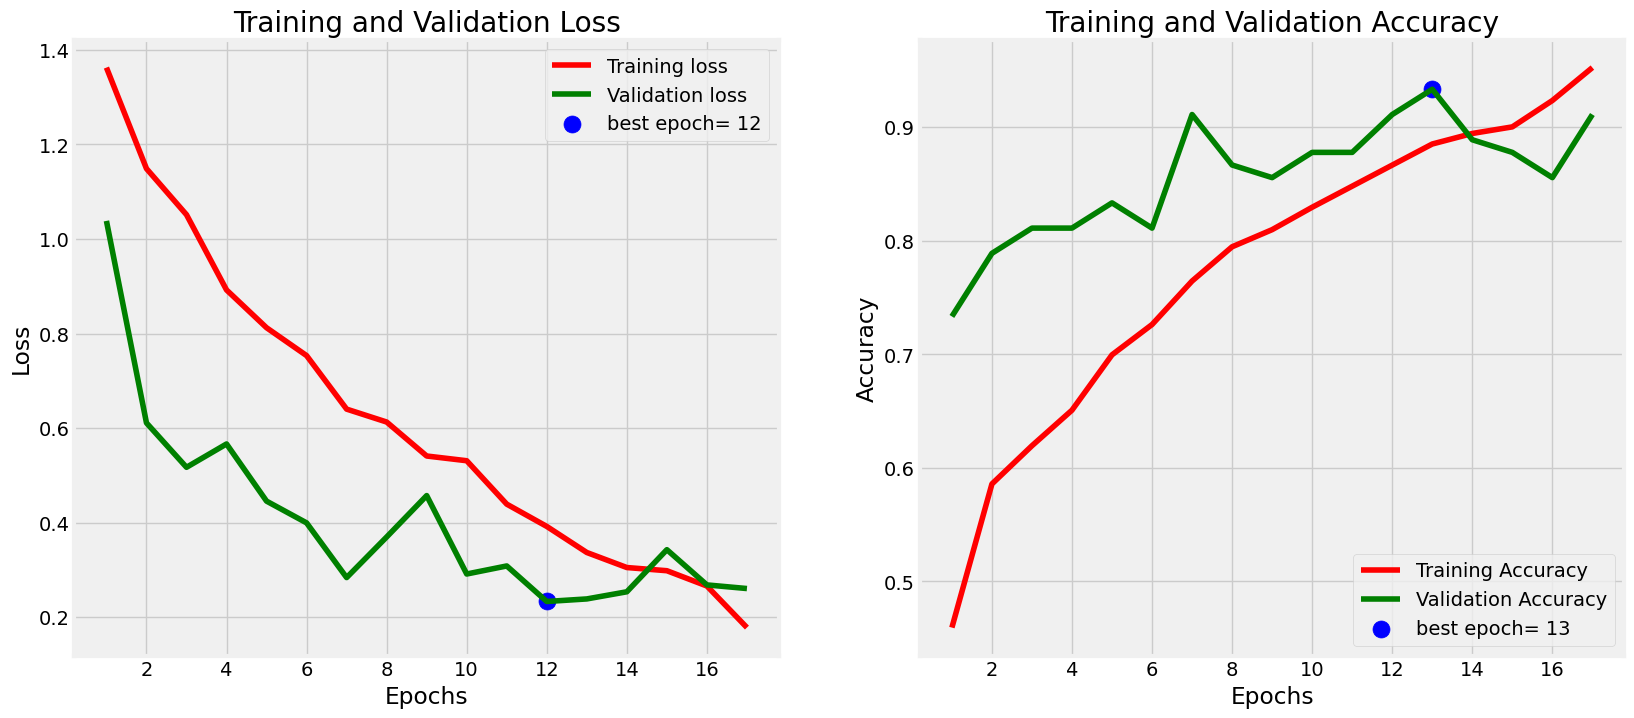

In [39]:
plot_training(history2)

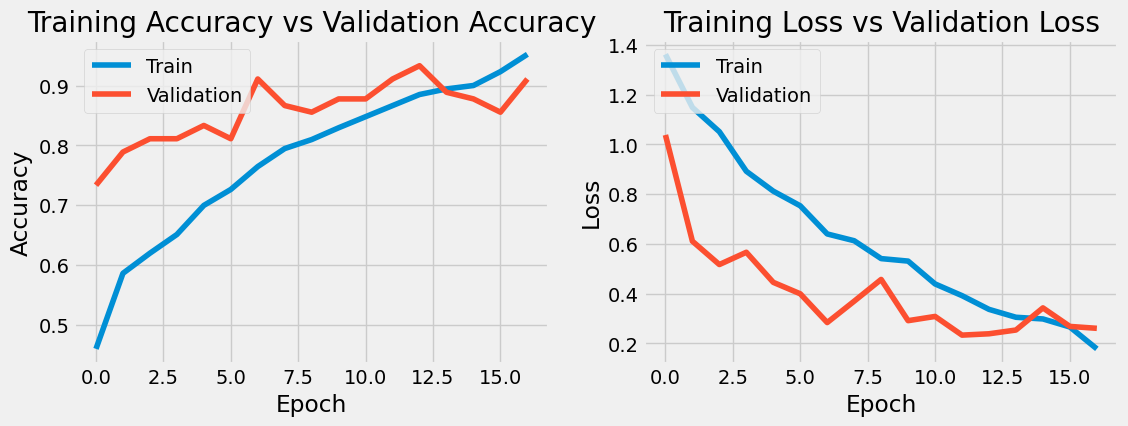

In [40]:
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [42]:

#Make predictions
y_probs = model.predict(validation_generator)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

3/3 [==============================] - 3s 973ms/step


In [50]:
Y_test = []
for i in range(len(validation_generator)):
    for j in validation_generator[i][1]:
        Y_test.append(np.argmax(j))
y_pred = np.argmax(model.predict(validation_generator), axis=1)
print(classification_report(Y_test, y_pred))


3/3 [==============================] - 3s 702ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.73      0.73        15
           2       1.00      1.00      1.00        22
           3       0.92      0.85      0.88        13
           4       0.77      0.81      0.79        21

    accuracy                           0.89        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.89      0.89      0.89        90



In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history3.history['accuracy']
train_loss = history3.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history3.history['accuracy'])
ax[0].plot(history3.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history3.history['loss'])
ax[1].plot(history3.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history4.history['accuracy']
train_loss = history4.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history4.history['accuracy'])
ax[0].plot(history4.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history4.history['loss'])
ax[1].plot(history4.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

In [ ]:
model.save('YogaNet_model_1_1.h5')

# Prétrained Model

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model_1_1.h5')
img = tf.keras.utils.load_img('/kaggle/input/yoga-poses-dataset/DATASET/TEST/goddess/00000000.jpg', target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

In [ ]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
ax = ax.ravel()

for i in range(0,25):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(28,28)),
  tf.keras.layers.GRU(128),
  tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
  tf.keras.layers.Dropout(0.2,input_shape=(128,)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
